<a href="https://colab.research.google.com/github/Hirokazzz/DataScientistLab/blob/master/Nvidia%2BGAFA%E6%A0%AA%E4%BE%A1%E5%88%86%E6%9E%90%E3%81%97%E3%81%A6%E3%81%BF%E3%81%9F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nvidia+GAFA株価の分析
2020年9月1日直近1年間の株価変動を振り返ります。

参考文献：東京大学のデータサイエンティスト育成講座 


    1.) 株価の時間による変化を見てみる。
    2.) 日ごとの変動を可視化する。
    3.) 移動平均を計算する
    4.) 複数の株価の終値の相関を計算する
    4.) 複数の株価の変動の関係を見る
    5.) 特定の株のリスクを計算する


#### 株価データの基本

pandasを使って株価のデータを扱う基本を学習

In [69]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# 可視化のためのセット
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Yahooからデータを読み
import pandas_datareader as pdd

# 日付と時刻を扱うためのモジュール
from datetime import datetime

# ローソクチャートのための読み込み
from plotly.offline import init_notebook_mode, iplot
from plotly import figure_factory as FF



In [70]:
data = []
# GAFA証券コード（アルファベットで表記）指定
tech_list = ['NVDA', 'AAPL', 'GOOG', 'FB', 'AMZN']

# 直近1年間のデータを取得
end = datetime.now()
start = datetime(end.year - 1, end.month,end.day)

# Yahooからデータを取得
for stock in tech_list:   
    # stockはtech_listで指定した値、'yahoo'は情報入手先、以降は時間指定
    data.append(pdd.DataReader(stock, 'yahoo', start,end))
    

### Nvidiaの株価

* Open:初値
* Hight:最高値
* Low:最低値
* Close:終値
* Volume:出来高
* Adj Close:終値（調整済）

In [44]:
# データの概要
data[0].describe()

,High,Low,Open,Close,Volume,Adj Close
count,253.000000,253.000000,253.000000,253.000000,2.530000e+02,253.000000
mean,291.117352,280.919644,285.633478,286.580119,1.121325e+07,286.400345
std,93.359749,90.386753,91.753257,92.319214,5.308735e+06,92.429000
min,165.910004,163.250000,164.580002,164.169998,3.471600e+06,163.876099
25%,214.369995,207.679993,211.029999,210.889999,7.226900e+06,210.512466
50%,262.220001,248.889999,254.899994,255.470001,9.417900e+06,255.353470
75%,362.100006,348.320007,353.010010,353.010010,1.356110e+07,352.848969
max,559.750000,537.460022,539.200012,552.840027,2.939730e+07,552.840027


In [45]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2019-09-03 to 2020-09-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       253 non-null    float64
 1   Low        253 non-null    float64
 2   Open       253 non-null    float64
 3   Close      253 non-null    float64
 4   Volume     253 non-null    float64
 5   Adj Close  253 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


出来高と終値をプロットします。
2020年は3月に世界的なパンデミックの影響で株価が下落しています。
その後、各国による強力な金融緩和があり、急速に株価が上昇しています。

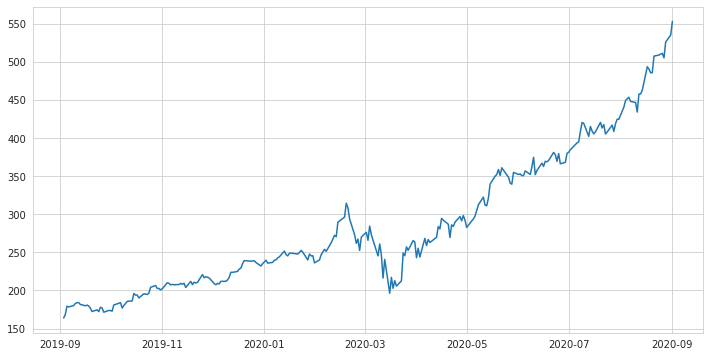

In [46]:
plt.figure(figsize=(12,6))
plt.plot(data[0]['Adj Close'])

出来高（1日に取引が成立した株の数）

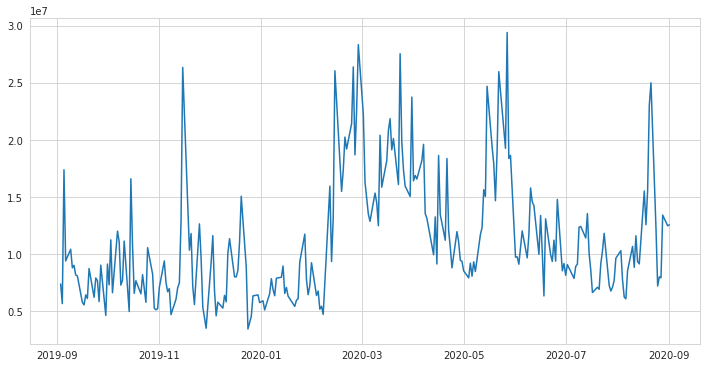

In [47]:
plt.figure(figsize=(12,6))
plt.plot(data[0]['Volume'])


### 移動平均線（moving average）

移動平均を求める関数
```
rolling(window=ma).mean()
```

rolling()の引数、windowについて
window ： int、またはoffset 移動するウィンドウのサイズ。これは、統計の計算に使用される観測値の数です。各ウィンドウは固定サイズになります。
オフセットの場合、これは各ウィンドウの期間になります。各ウィンドウは、期間に含まれる観測に基づいてサイズが可変になります。これは、datetimelikeインデックスにのみ有効です。

In [48]:
# 間隔ごとに移動平均
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA {}".format(str(ma))
    data[0][column_name] = data[0]['Adj Close'].rolling(window=ma).mean()

In [49]:
data[0]

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50
Date,,,,,,,,,
2019-09-03,165.910004,163.250000,164.580002,164.169998,7403500.0,163.876099,NaN,NaN,NaN
2019-09-04,169.059998,166.610001,166.610001,168.759995,5693200.0,168.457886,NaN,NaN,NaN
2019-09-05,179.990005,172.800003,172.869995,179.740005,17391900.0,179.418243,NaN,NaN,NaN
2019-09-06,181.089996,177.119995,178.800003,178.649994,9424400.0,178.330170,NaN,NaN,NaN
2019-09-09,183.979996,179.839996,179.899994,180.500000,10438100.0,180.176865,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2020-08-26,514.739990,507.109985,511.970001,510.920013,8031100.0,510.920013,491.244003,467.109502,424.464001
2020-08-27,514.000000,502.660004,511.260010,505.130005,7940100.0,505.130005,495.985004,471.138002,427.177802
2020-08-28,525.919983,505.700012,507.000000,525.909973,13429000.0,525.909973,502.320001,476.204001,430.321601


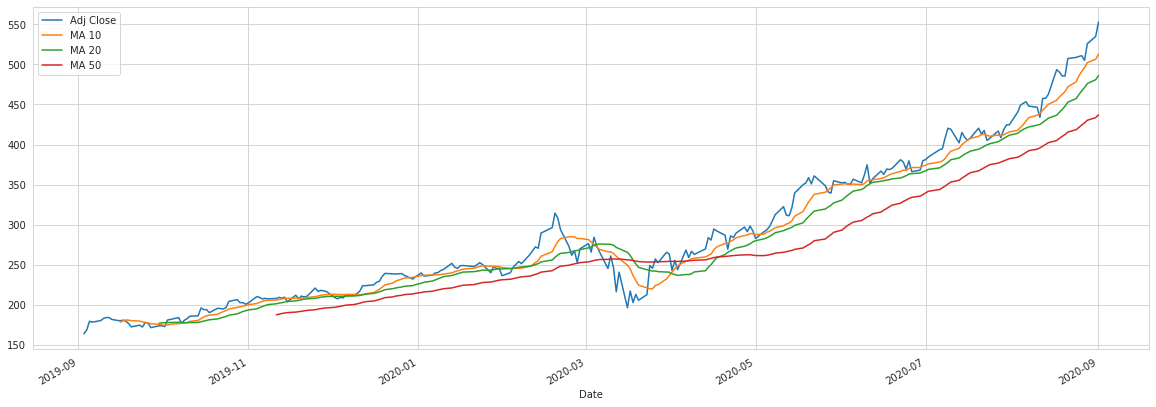

In [50]:
data[0][['Adj Close','MA 10','MA 20','MA 50']].plot(subplots=False,figsize=(20,7))

#### 株価と日ごとの変動

株式投資のリスクを管理するために、日ごとの変動について計算してみます。

pct_change()はパーセンテージ化する関数

pct_change()を使うと、1日ごとの終値の変化の割合を計算できます。

In [51]:
data[0]['Daily Return'] = data[0]['Adj Close'].pct_change()
data[0] # Daily Return結果が追加された

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,
2019-09-03,165.910004,163.250000,164.580002,164.169998,7403500.0,163.876099,NaN,NaN,NaN,NaN
2019-09-04,169.059998,166.610001,166.610001,168.759995,5693200.0,168.457886,NaN,NaN,NaN,0.027959
2019-09-05,179.990005,172.800003,172.869995,179.740005,17391900.0,179.418243,NaN,NaN,NaN,0.065063
2019-09-06,181.089996,177.119995,178.800003,178.649994,9424400.0,178.330170,NaN,NaN,NaN,-0.006064
2019-09-09,183.979996,179.839996,179.899994,180.500000,10438100.0,180.176865,NaN,NaN,NaN,0.010355
...,...,...,...,...,...,...,...,...,...,...
2020-08-26,514.739990,507.109985,511.970001,510.920013,8031100.0,510.920013,491.244003,467.109502,424.464001,0.001804
2020-08-27,514.000000,502.660004,511.260010,505.130005,7940100.0,505.130005,495.985004,471.138002,427.177802,-0.011333
2020-08-28,525.919983,505.700012,507.000000,525.909973,13429000.0,525.909973,502.320001,476.204001,430.321601,0.041138


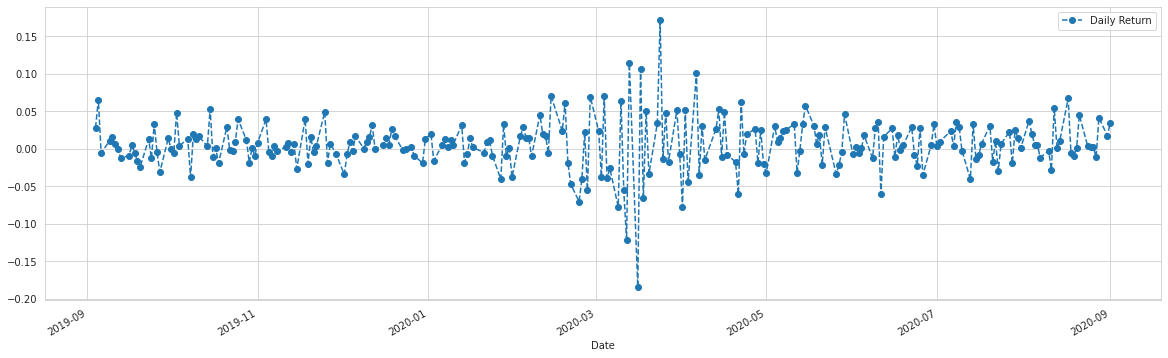

In [52]:
# 変化率をプロット
data[0]['Daily Return'].plot(figsize=(20,6),legend=True,linestyle='--',marker='o')

前日比（％）のヒストグラム

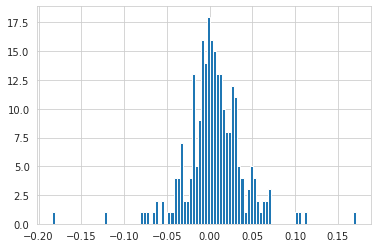

In [53]:
data[0]['Daily Return'].hist(bins=100)

SeabornでKDEをプロットします。

KDEプロット： カーネル密度推定 (kernel density estimate) プロットを KDE プロットと言います。 plot に kind='kde' を指定することで混合正規分布カーネル密度推定を用いた密度プロットをすることができます。

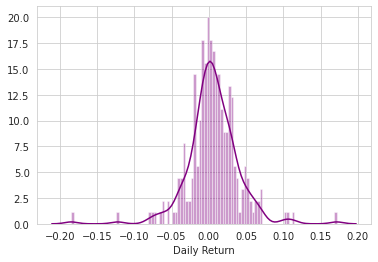

In [54]:
# NaNを取り除いてプロット
sns.distplot(data[0]['Daily Return'].dropna(),bins=100,color='purple')

#### ローソクチャートを描く

In [55]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [56]:
configure_plotly_browser_state()
# Jupyter notebook用設定
init_notebook_mode(connected=True)# 関数の実行はupyter notebook用設定の下に書く

# ローソクチャートの設定
fig = FF.create_candlestick(data[0].Open, data[0].High, data[0].Low, data[0].Close, dates = data[0].index)
iplot(fig)

## GAFAの株価を1つのDataFrameにまとめる。

In [71]:
data_list = {'NVDA':data[0]['Adj Close'],
             'AAPL':data[1]['Adj Close'],
             'GOOG':data[2]['Adj Close'],
             'FB':data[3]['Adj Close'],
             'AMZN':data[4]['Adj Close']}

datas = pd.DataFrame(data_list)
datas.head()

,NVDA,AAPL,GOOG,FB,AMZN
Date,,,,,
2019-09-03,163.876099,50.919777,1168.390015,182.389999,1789.839966
2019-09-04,168.457886,51.783714,1181.410034,187.139999,1800.619995
2019-09-05,179.418243,52.796162,1211.380005,190.899994,1840.719971
2019-09-06,178.330170,52.791210,1204.930054,187.490005,1833.510010
2019-09-09,180.176865,53.016479,1204.410034,188.759995,1831.349976


Apple社でやったように、終値の日ごとの変化を計算します。

In [72]:
# 別のDataFrameにしておきます。
tech_rets = datas.pct_change()

終値の変化を会社ごとに比較できるようになりました。

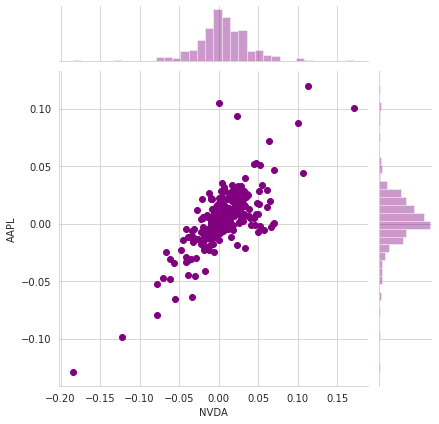

In [73]:
# GoogleとMicrosoftを比較
sns.jointplot('NVDA','AAPL', tech_rets, kind='scatter',color='purple')

2つの会社の株価の変化率は相当関係があることがわかります。pearsonrは相関係数(正確には、ピアソン積率相関係数）ですが、0.52と正に相関していることを示しています。


sns.pairplot()を使用して4社の相関を確認します。

4社それぞれ強い相関関係が確認できますが、アマゾンは直近２ヶ月でばらつきが大きくなっているようです。

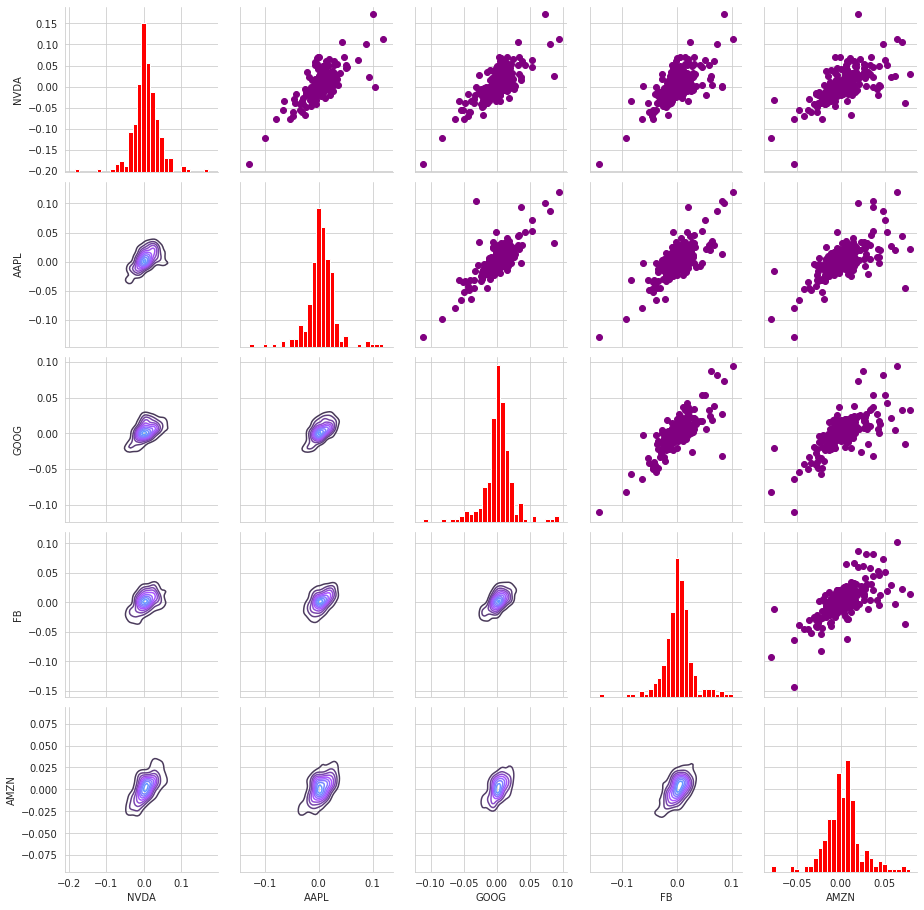

In [74]:
# データを格納しているDataFrameを引数にして、PairGridを作ります。
returns_fig = sns.PairGrid(tech_rets.dropna())

# 右上側に描くグラフの種類を指定
returns_fig.map_upper(plt.scatter, color='purple')

# 同じように、左下側には、KDEプロットを描く
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')

# 対角線上には、ヒストグラムを描く
returns_fig.map_diag(plt.hist, bins=30, color='red')

終値についても描画します。

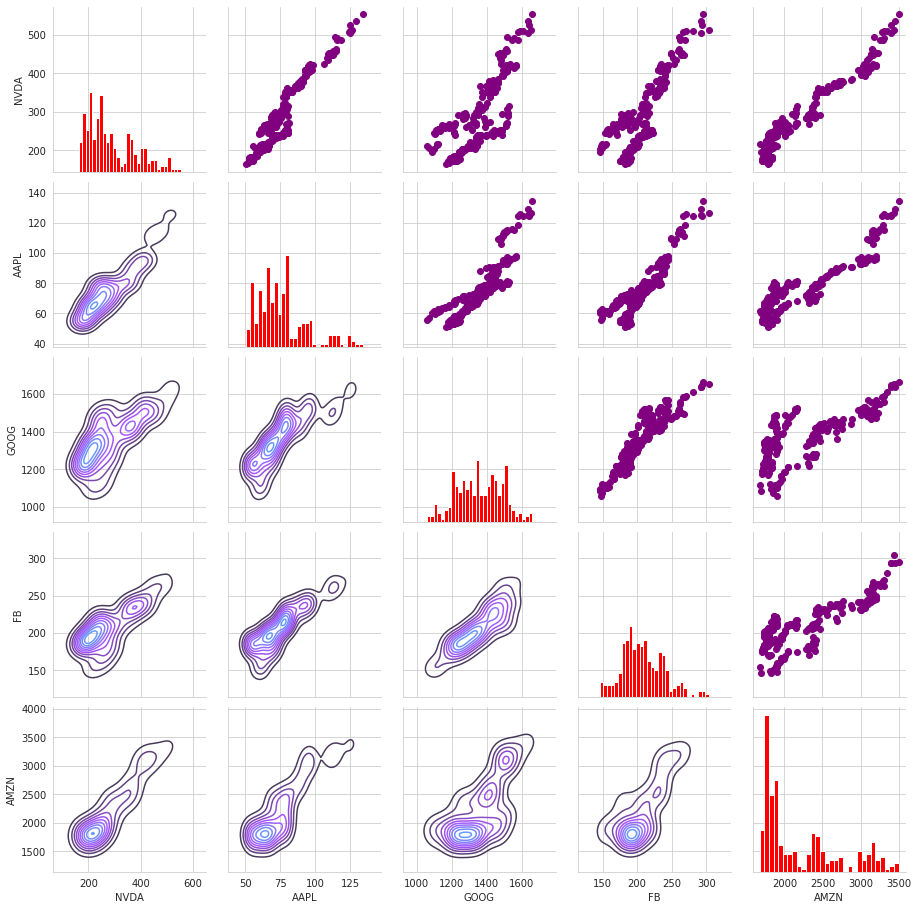

In [75]:
# この部分以外は同じコードです。
returns_fig = sns.PairGrid(datas)

returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30, color='red')

#### ヒートマップを描く
やはりアップルはやや相関が小さくなっている

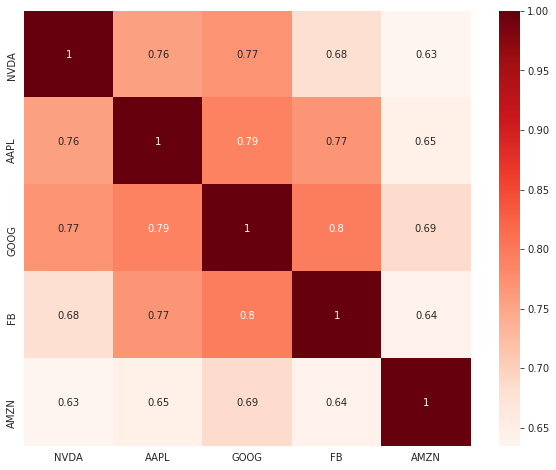

In [76]:
# 相関係数の数値が欲しい場合には、heatmapが使えます。
plt.figure(figsize=(10, 8)) 
sns.heatmap(tech_rets.corr(), cmap='Reds', annot=True)

#### リスク解析
Nvidiaはハイリスク・ハイリターンのようです。

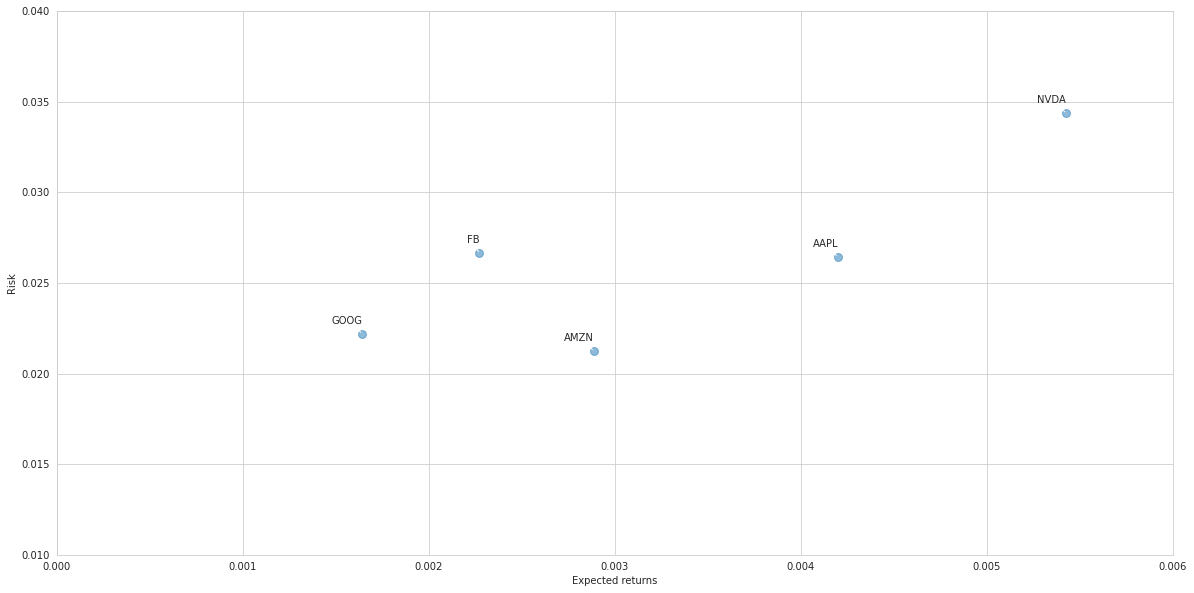

In [79]:
# リスクの基本はその株価の変動幅です。
rets = tech_rets.dropna()

area = np.pi*20
plt.figure(figsize=(20,10))
plt.scatter(rets.mean(), rets.std(), alpha = 0.5, s =area)

plt.ylim([0.01,0.04])
plt.xlim([0,0.006])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

# グラフにアノテーションを付けます。
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (0, 10),
        textcoords = 'offset points', ha = 'right',
        arrowprops = dict(arrowstyle='-', connectionstyle= 'arc3'))
